# Random Weight Initialization for Small Values:

In [93]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/diabetes-dataset-using-many-medical-metrics/diabetes (1).csv


In [94]:
df = pd.read_csv("/kaggle/input/diabetes-dataset-using-many-medical-metrics/diabetes (1).csv")

In [96]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [97]:
df.shape

(768, 9)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [100]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [101]:
df.duplicated().sum()

0

In [102]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [82]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

# Model for small random value

In [83]:
model = Sequential()
model.add(Dense(2,activation='tanh' , input_dim=2,))
model.add(Dense(2,activation='tanh'))
model.add(Dense(2,activation='tanh'))
model.add(Dense(2,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

In [84]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27 (108.00 B)

 Trainable params: 27 (108.00 B)

 Non-trainable params: 0 (0.00 B)

In [85]:
model.get_weights()

[array([[ 0.24168444,  0.5545683 ],
        [ 0.2809689 , -0.07075763]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.07786405,  0.14523768],
        [ 0.81107366, -0.1086446 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.4783771 , -0.6824812 ],
        [ 0.7870735 ,  0.21816754]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[1.1759137 , 0.34143555],
        [1.0557848 , 0.359789  ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.00130618],
        [-0.12529993]], dtype=float32),
 array([0.], dtype=float32)]

In [86]:
initial_weights = model.get_weights()

In [87]:
initial_weights[0] = np.random.randn(model.get_weights()[0].shape[0],model.get_weights()[0].shape[1])*0.01
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(model.get_weights()[2].shape[0],model.get_weights()[2].shape[1])*0.01
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

initial_weights[4] = np.random.randn(model.get_weights()[4].shape[0],model.get_weights()[4].shape[1])*0.01
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(model.get_weights()[6].shape[0],model.get_weights()[6].shape[1])*0.01
initial_weights[7] = np.zeros(model.get_weights()[7].shape)

initial_weights[8] = np.random.randn(model.get_weights()[8].shape[0],model.get_weights()[8].shape[1])*0.01
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [88]:
model.set_weights(initial_weights)

In [64]:
model.get_weights()

[array([[-0.00425953,  0.00777091],
        [ 0.00551292, -0.0078727 ],
        [ 0.00950345, -0.02162175],
        [-0.00066227, -0.00778329],
        [ 0.00781519, -0.00765232],
        [-0.0155812 ,  0.01784393],
        [ 0.01147222,  0.02565036],
        [ 0.01654104, -0.00140095]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.01119744,  0.00719154],
        [ 0.00633685, -0.00458535]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.01185917, -0.01523498],
        [-0.00890905,  0.00219897]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.01944822,  0.00292137],
        [-0.00188125, -0.00388144]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.0038348 ],
        [0.00231357]], dtype=float32),
 array([0.], dtype=float32)]

In [89]:
model.compile(loss = 'binary_crossentropy' , optimizer = 'adam',metrics = ['accuracy'])

In [90]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6557 - loss: 0.6924 - val_accuracy: 0.6429 - val_loss: 0.6904
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6454 - loss: 0.6896 - val_accuracy: 0.6429 - val_loss: 0.6875
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6581 - loss: 0.6862 - val_accuracy: 0.6429 - val_loss: 0.6844
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6467 - loss: 0.6832 - val_accuracy: 0.6429 - val_loss: 0.6808
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6587 - loss: 0.6781 - val_accuracy: 0.6429 - val_loss: 0.6766
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6284 - loss: 0.6774 - val_accuracy: 0.6429 - val_loss: 0.6723
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6378 - loss: 0.6718 - val_accuracy: 0.6429 - val_loss: 0.6676
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6663 - loss: 0.6610 - val_accuracy: 0.6429 - 

In [91]:
model.get_weights()

[array([[-0.3481169 , -0.33266488],
        [ 0.16479395,  0.16609086]], dtype=float32),
 array([0.3728459 , 0.31145716], dtype=float32),
 array([[0.5053675 , 0.5220075 ],
        [0.5212842 , 0.51772237]], dtype=float32),
 array([0.24369538, 0.24613982], dtype=float32),
 array([[ 0.41634676, -0.42054766],
        [ 0.4094101 , -0.42918277]], dtype=float32),
 array([ 0.26830027, -0.26526213], dtype=float32),
 array([[ 0.36987796, -0.37647665],
        [-0.3852393 ,  0.37995714]], dtype=float32),
 array([ 0.25727874, -0.2594172 ], dtype=float32),
 array([[-0.3352958 ],
        [ 0.33237636]], dtype=float32),
 array([-0.1843493], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

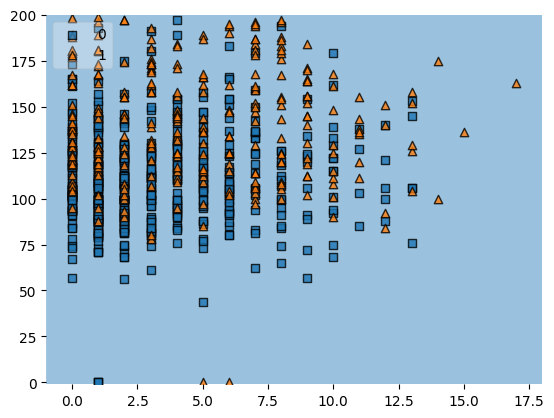

In [92]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'),clf = model,legend=2)

# Why we should avoid Random Weight Initialization for large Values:
- intialize in [0,1] range it consider as large value

In [103]:
model = Sequential()
model.add(Dense(2,activation='tanh' , input_dim=2,))
model.add(Dense(2,activation='tanh'))
model.add(Dense(2,activation='tanh'))
model.add(Dense(2,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

In [104]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27 (108.00 B)

 Trainable params: 27 (108.00 B)

 Non-trainable params: 0 (0.00 B)

In [105]:
model.get_weights()

[array([[ 0.6724031 ,  0.09302127],
        [-0.84962285, -0.7892789 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-1.0757486 , -1.120714  ],
        [ 1.1377543 ,  0.09375775]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.17149186, -0.982699  ],
        [ 0.4776249 ,  0.6224903 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.45257235, -0.07630563],
        [ 0.08059371,  0.39770317]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[1.0509516],
        [1.321503 ]], dtype=float32),
 array([0.], dtype=float32)]

In [106]:
initial_weights = model.get_weights()

In [107]:
initial_weights[0] = np.random.randn(model.get_weights()[0].shape[0],model.get_weights()[0].shape[1])
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(model.get_weights()[2].shape[0],model.get_weights()[2].shape[1])
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

initial_weights[4] = np.random.randn(model.get_weights()[4].shape[0],model.get_weights()[4].shape[1])
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(model.get_weights()[6].shape[0],model.get_weights()[6].shape[1])
initial_weights[7] = np.zeros(model.get_weights()[7].shape)

initial_weights[8] = np.random.randn(model.get_weights()[8].shape[0],model.get_weights()[8].shape[1])
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [108]:
model.set_weights(initial_weights)

In [109]:
model.get_weights()

[array([[-0.53274477,  1.4346417 ],
        [ 0.18422695, -0.15960483]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.5701011 , -1.7544286 ],
        [ 0.8673259 , -0.34175485]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.2941453 , -1.4155672 ],
        [ 1.2113606 , -0.17880802]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.9945066 ,  1.5991367 ],
        [ 0.20787096, -0.03350103]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-1.2921468 ],
        [-0.16549838]], dtype=float32),
 array([0.], dtype=float32)]

In [110]:
model.compile(loss = 'binary_crossentropy' , optimizer = 'adam',metrics = ['accuracy'])
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6417 - loss: 0.6548 - val_accuracy: 0.6429 - val_loss: 0.6534
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6518 - loss: 0.6466 - val_accuracy: 0.6429 - val_loss: 0.6527
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6687 - loss: 0.6346 - val_accuracy: 0.6429 - val_loss: 0.6523
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6599 - loss: 0.6399 - val_accuracy: 0.6429 - val_loss: 0.6519
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6579 - loss: 0.6414 - val_accuracy: 0.6429 - val_loss: 0.6521
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6601 - loss: 0.6405 - val_accuracy: 0.6429 - val_loss: 0.6522
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6394 - loss: 0.6534 - val_accuracy: 0.6429 - val_loss: 0.6518
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6556 - loss: 0.6426 - val_accuracy: 0.6429 - 

In [111]:
model.get_weights()

[array([[-0.31976032,  1.467531  ],
        [ 0.20731342, -0.17564544]], dtype=float32),
 array([0.4210033, 0.4155897], dtype=float32),
 array([[-0.62317765, -1.697325  ],
        [ 0.9703713 , -0.53735894]], dtype=float32),
 array([-0.01345586, -0.06788281], dtype=float32),
 array([[-0.37864202, -1.3151997 ],
        [ 1.2016526 , -0.2801368 ]], dtype=float32),
 array([0.02293643, 0.11330999], dtype=float32),
 array([[-1.0279244 ,  1.5788296 ],
        [ 0.13832726, -0.10777309]], dtype=float32),
 array([-0.01077154, -0.01456522], dtype=float32),
 array([[-1.3040912 ],
        [-0.14513199]], dtype=float32),
 array([0.01786709], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

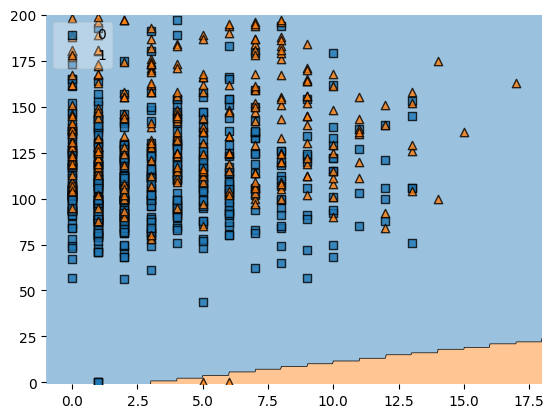

In [112]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'),clf = model,legend=2)